In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [49]:
def normalizar(num,fator,mini):
    return fator*(num-mini)

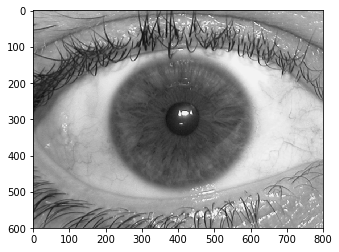

In [55]:
#Lê a imagem em escala de cinza
img = cv2.imread('/home/neto/pesquisa/Sessao_1/1/Img_1_1_1.jpg',0)
img = cv2.GaussianBlur(img,(3,3),7)
plt.imshow(img,cmap='gray')

# Detecção de borda com Sobel

### Dados preliminares:


- Derivada parcial em relação a $x$ :
$ \frac{\delta f(x,y)}{\delta x} = f(x+1,y) - f(x,y)$

- Derivada parcial em relação a $y$ :
$\frac{\delta f(x,y)}{\delta y} = f(x,y+1) - f(x,y)$

- Gradiente da imagem:$\nabla f(x,y) = 
\left[\begin{array}{cc} 
g_x\\
g_y
\end{array}\right]
$

- Componente do eixo $x$: $g_x =  \frac{\delta f(x,y)}{\delta x} $
- Componente do eixo $y$: $g_y =  \frac{\delta f(x,y)}{\delta y} $

Sabendo dessas informações como mostrado
em Gonzales e Woods pode-se representar essas
duas derivada como mascaras espaciais:

- Mascaras Prewitt

    - Horizontal:
$\left[\begin{array}{cc}
-1 & -1 & -1 \\
0 & 0 & 0\\
1 & 1 & 1\\
\end{array}\right] $

    - Vertical: 
$\left[\begin{array}{cc}
-1 & 0 & 1 \\
-1 & 0 & 1\\
-1 & 0 & 1\\
\end{array}\right] $


- Mascara Sobel derivada do Prewitt com pesos no centro:

    - Horizontal:
$\left[\begin{array}{cc}
-1 & -2 & -1 \\
0 & 0 & 0\\
1 & 2 & 1\\
\end{array}\right] $

    - Vertical: 
$\left[\begin{array}{cc}
-1 & 0 & 1 \\
-2 & 0 & 2\\
-1 & 0 & 1\\
\end{array}\right] $


##### Após obter as componentes $g_x$ e $g_y$ calcula-se a magnitude do gradiente da seguinte forma:
- $ mag( \nabla f(x,y)) = \sqrt{g_x^2+g_Y^2}$
ou
- Aproxamação:$ mag( \nabla f(x,y)) = |g_x|+|g_Y|$



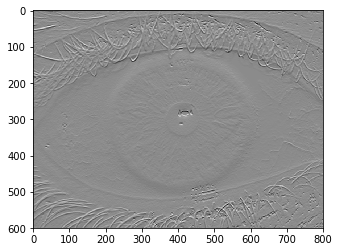

In [56]:
#Obtendo componente gy
prewitt_horizontal = np.array([[ 1,  2,  1],
                               [ 0,  0,  0],
                               [-1, -2, -1]
                              ])
g_y = cv2.filter2D(img,cv2.CV_32F,prewitt_horizontal)
plt.imshow(g_y,cmap='gray')

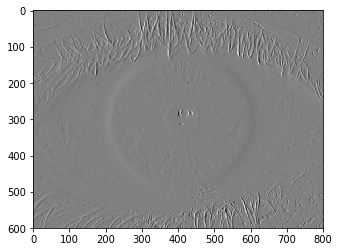

In [57]:
#Obtendo componente gx
prewitt_vertical = np.array([[ 1,0,-1],
                             [ 2,0,-2],
                             [ 1,0,-1]
                              ])
g_x = cv2.filter2D(img,cv2.CV_32F,prewitt_vertical)
plt.imshow(g_x,cmap='gray')

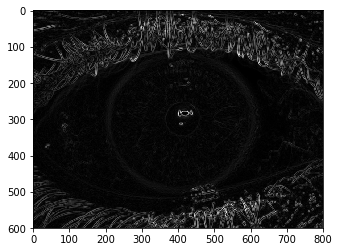

In [58]:
#Calculando a magnitude do gradiente
n = np.power(g_x,2) + np.power(g_y,2)
magnitude = np.sqrt(n)
magnitude = normalizar(magnitude[:,:],255/(np.max(magnitude)-np.min(magnitude)),np.min(magnitude))
plt.imshow(magnitude,cmap='gray')

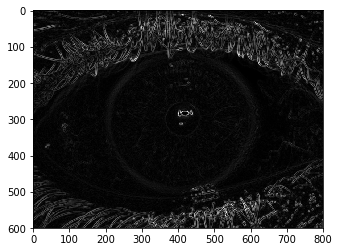

In [59]:
nova_img = np.abs(g_x) + np.abs(g_y)
plt.imshow(nova_img,cmap='gray')